In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import fsolve
import scipy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn import svm
import scipy.misc

import graphlearning as gl

import matplotlib.pyplot as plt

In [4]:
from sklearn import linear_model as linear
from sklearn import metrics as metrics

In [5]:
from torchvision import datasets, transforms

In [6]:
import sys

In [7]:
sys.path.append('../')

In [8]:
import classifier

In [9]:
import pickle

In [10]:
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

In [11]:
objs = []

In [12]:
fmnist = datasets.FashionMNIST("/home/taanish/FashionMNIST", train=True, download=False)

In [15]:
X = fmnist.data.numpy()

In [16]:
X = np.reshape(X, (X.shape[0], 784))

In [19]:
labels = fmnist.targets.numpy()

In [14]:
#X_10k = X[:10000,:28,:28]

In [38]:
#X_10k = np.reshape(X_10k, (10000, 784))

In [33]:
#labels_10k = mnist.targets.numpy()[:10000]

In [20]:
# 10000 labels, 10% labeled

In [39]:
#cl = classifier.ClassificationTests(X_10k, labels, 1000, 10000)

In [26]:
cl = classifier.Classifier(X, labels)

In [22]:
# first experiment: average scores

In [34]:
gs, os = classifier.ClassificationExperiments.run(tester=cl, n=10000, m=1000, trials=5)

 train() is being ran with the following parameters:
                Number of samples: 10000
                Number of labeled samples: 1000
                Nearest neighbors: 100
                Eigenvectors: 10
            


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Completed trial 0
 train() is being ran with the following parameters:
                Number of samples: 10000
                Number of labeled samples: 1000
                Nearest neighbors: 100
                Eigenvectors: 10
            


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Completed trial 1
 train() is being ran with the following parameters:
                Number of samples: 10000
                Number of labeled samples: 1000
                Nearest neighbors: 100
                Eigenvectors: 10
            


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Completed trial 2
 train() is being ran with the following parameters:
                Number of samples: 10000
                Number of labeled samples: 1000
                Nearest neighbors: 100
                Eigenvectors: 10
            


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[4.63713212e-09 5.28224336e-10 1.41294831e-09 1.23420990e-09
 4.87326434e-11 1.88117891e-10 4.55242999e-10 5.28519028e-09
 3.86345429e-08 2.38971997e-08]
not reaching the requested tolerance 1e-08.
Use iteration 1000 instead with accuracy 
7.577476386568485e-09.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accuracies 
[4.63695476e-09 5.28198619e-10 1.41286473e-09 1.23405658e-09
 4.53117633e-11 1.70883986e-10 4.26380202e-10 4.75765642e-09
 1.06220534e-08 1.1923382

Completed trial 3
 train() is being ran with the following parameters:
                Number of samples: 10000
                Number of labeled samples: 1000
                Nearest neighbors: 100
                Eigenvectors: 10
            


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Completed trial 4


In [35]:
gs_101 = gs

In [36]:
os_101 = os

In [37]:
objs.append(gs_101)
objs.append(os_101)

In [38]:
gs_101

[0.641, 0.653, 0.662, 0.635, 0.653]

In [39]:
os_101

[0.6811111111111111,
 0.6522222222222223,
 0.6522222222222223,
 0.649,
 0.6658888888888889]

In [59]:
# second experiment: average scores, varying eigenvectors

In [49]:
steps = [10, 15, 20]

In [32]:
gsve_101, osve_101 = classifier.ClassificationExperiments.vary_eigenvectors(tester=cl, trials=5, steps=steps)

NameError: name 'steps' is not defined

In [31]:
gsve_101

NameError: name 'gsve_101' is not defined

In [29]:
objs.append(gsve_101)
objs.append(osve_101)

NameError: name 'gsve_101' is not defined

In [ ]:
plt.scatter(steps, osve_101)
plt.savefig("fm_osve_101.png")

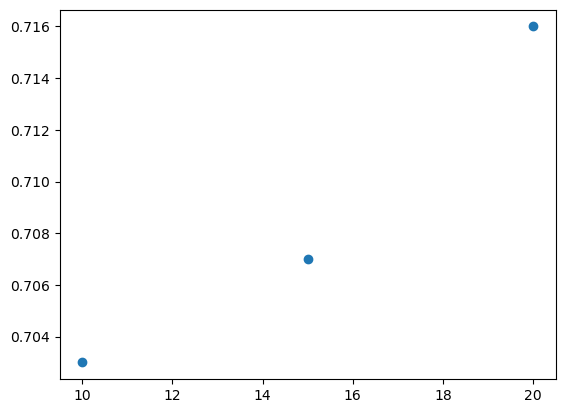

In [80]:
plt.scatter(steps, gsve_101)
plt.savefig("fm_gsve_101.png")

In [72]:
plt.show()

In [60]:
# third experiment: average scores, varying nearest neighbors

In [55]:
nn_steps = [100,200,300]

In [62]:
gsnn_101, osnn_101 = classifier.ClassificationExperiments.vary_neighbors(tester=cl, trials=5, steps=nn_steps)

/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[4.29933488e-09 2.17262746e-09 3.76981485e-10 3.02398745e-11
 3.72532748e-11 1.83024780e-11 2.11515950e-11 2.96385026e-11
 3.07172525e-11 1.19752772e-11 2.77533371e-11 3.61355256e-11
 6.89208405e-11 1.39983419e-10 1.48123646e-10 2.89574331e-10
 9.55669396e-10 2.01841609e-09 1.80899393e-09 2.28517632e-08]
not reaching the requested tolerance 1e-08.
Use iteration 1000 instead with accuracy 
1.7465671816238893e-09.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accura

Completed trial 0


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[2.59337997e-09 1.19124485e-09 1.02746599e-09 6.85000551e-10
 1.52940871e-10 4.82291062e-11 3.28852592e-11 7.03138391e-11
 6.61344609e-11 3.14362973e-11 5.12730089e-11 1.29467117e-10
 5.46012475e-11 2.40751575e-11 1.80561623e-10 1.22737594e-09
 1.11571895e-09 1.22975016e-08 1.27839731e-09 2.35639120e-06]
not reaching the requested tolerance 1e-08.
Use iteration 992 instead with accuracy 
1.0009938223547849e-07.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accurac

Completed trial 1


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[2.51935236e-09 4.34158851e-10 6.69832364e-10 5.36233272e-11
 3.59206465e-11 1.78033878e-11 1.57130650e-11 2.22922177e-11
 3.50669027e-11 1.30489265e-11 3.02992437e-11 4.38584578e-11
 1.23126384e-10 1.94189651e-11 1.62757581e-10 6.15928397e-10
 2.08610729e-09 5.12792032e-08 4.32496602e-09 7.23511004e-07]
not reaching the requested tolerance 1e-08.
Use iteration 988 instead with accuracy 
3.618144508164725e-08.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accuraci

Completed trial 2


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[7.39721979e-06 2.06903666e-07 1.88306568e-06 3.98699961e-06
 2.74245172e-06 1.08799709e-06 1.87676290e-06 9.39948501e-06
 1.01613475e-05 5.51840940e-06 5.37850663e-06 6.42533743e-06
 1.44451493e-06 4.55808984e-06 6.26880930e-06 1.17959508e-06
 8.51437583e-06 1.04117826e-05 3.92868646e-06 6.69555407e-06]
not reaching the requested tolerance 1e-08.
Use iteration 616 instead with accuracy 
2.0891769109630742e-07.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accurac

Completed trial 3


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[3.96603863e-09 1.83581630e-10 9.79380195e-11 5.68930092e-11
 6.16898971e-11 3.08544015e-11 1.15889933e-11 9.08984819e-12
 1.47018091e-11 1.48516838e-11 4.85017883e-11 2.18375481e-11
 6.19666175e-11 7.22122834e-11 3.86365847e-11 3.79699991e-10
 1.87107639e-10 3.96537452e-09 1.17994952e-08 9.26450703e-07]
not reaching the requested tolerance 1e-08.
Use iteration 1000 instead with accuracy 
4.6172049267425114e-08.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accura

Completed trial 4
Completed step 100


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[3.64894066e-09 7.76733335e-10 1.08598008e-09 7.07500161e-11
 6.63471866e-11 3.36843879e-11 2.52700978e-11 3.42625723e-11
 3.93402758e-11 3.61270625e-11 3.56182865e-11 1.19786199e-10
 6.19728348e-11 1.94582025e-10 1.18300008e-10 5.96585587e-10
 1.74811954e-10 3.70478030e-10 2.02486347e-08 1.25830440e-06]
not reaching the requested tolerance 1e-08.
Use iteration 992 instead with accuracy 
5.3928198204351194e-08.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accurac

Completed trial 0


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[2.57843660e-09 1.00381756e-09 1.83462636e-09 1.65689235e-09
 3.78474290e-11 3.60886249e-11 3.19295209e-11 6.34540294e-11
 7.15823966e-11 5.97505840e-11 2.04340590e-11 4.20864675e-11
 5.35452594e-11 3.32236881e-10 2.09830891e-10 4.03913063e-10
 4.17656085e-10 1.34399986e-09 5.25498888e-09 1.76237332e-08]
not reaching the requested tolerance 1e-08.
Use iteration 971 instead with accuracy 
1.4949826514746709e-09.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accurac

Completed trial 1


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Completed trial 2


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Completed trial 3


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[2.99261434e-02 8.56596791e-04 2.51687874e-04 5.97046031e-04
 2.07287036e-03 3.68157620e-04 2.16065379e-04 3.50916310e-04
 8.04992560e-04 2.72058904e-04 2.79101560e-04 3.14648897e-04
 7.97947469e-04 1.02695086e-04 2.27789039e-04 2.57546106e-05
 3.96868665e-04 2.28780281e-04 1.86610671e-03 5.89431843e-04]
not reaching the requested tolerance 1e-08.
Use iteration 409 instead with accuracy 
6.013538378188432e-08.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accuraci

Completed trial 4
Completed step 200


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[3.85158788e-09 3.22246155e-09 3.79213914e-09 2.96963872e-09
 5.63236382e-09 1.77777954e-09 2.81156810e-09 2.97311649e-09
 2.75521648e-09 1.90066582e-09 3.30089762e-09 1.66313126e-09
 2.64543586e-09 1.04904044e-09 9.21980094e-10 1.25433875e-09
 2.57454088e-09 1.10731820e-09 4.68074497e-09 3.22064743e-07]
not reaching the requested tolerance 1e-08.
Use iteration 955 instead with accuracy 
1.100027122688726e-08.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accuraci

Completed trial 0


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[4.77684469e-09 3.87648080e-06 1.32419289e-06 4.90657323e-06
 2.16745561e-06 2.11864852e-05 5.56013192e-06 8.62758382e-06
 2.08415911e-06 2.64434173e-05 9.79127864e-07 1.24007225e-05
 1.27981351e-05 4.08409388e-06 8.42321973e-06 4.65024010e-06
 1.40704992e-06 1.41014601e-05 1.18800946e-05 9.81938037e-06]
not reaching the requested tolerance 1e-08.
Use iteration 811 instead with accuracy 
7.703634096950017e-06.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accuraci

Completed trial 1


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Completed trial 2


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[4.29535707e-09 4.68709370e-09 2.13390642e-09 5.34922616e-10
 3.53650569e-10 6.16953040e-11 1.46028427e-10 3.15527557e-11
 6.85556066e-11 2.53602020e-11 8.78705553e-10 5.54734099e-10
 9.28844769e-11 8.65928626e-10 2.08833811e-09 6.71983939e-10
 1.75799479e-09 7.30602981e-09 3.67180538e-09 4.93153272e-08]
not reaching the requested tolerance 1e-08.
Use iteration 978 instead with accuracy 
2.9400385702880575e-09.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accurac

Completed trial 3


/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[3.00365205e-06 1.41269067e-06 4.21705736e-07 4.14322310e-06
 1.38132239e-07 5.38096421e-07 1.84228502e-07 5.34364804e-07
 3.05161300e-07 7.07812560e-07 2.37711709e-06 4.20199504e-07
 6.83676699e-07 1.41086940e-06 4.46809868e-07 1.87659944e-06
 6.81928780e-07 7.22344438e-07 1.64162092e-06 6.22807230e-07]
not reaching the requested tolerance 1e-08.
Use iteration 900 instead with accuracy 
2.4926936910859548e-08.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/Experiments/../manifoldlearning.py:162: UserWarning: Exited postprocessing with accurac

Completed trial 4
Completed step 300


In [96]:
objs.append(gsnn_101)
objs.append(osnn_101)

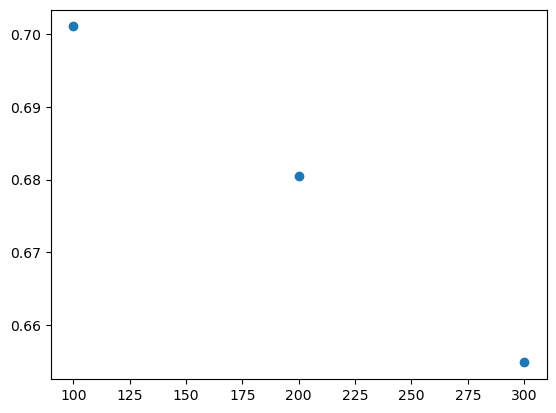

In [82]:
plt.scatter(nn_steps, osnn_101)
plt.savefig("fm_osnn_101.png")

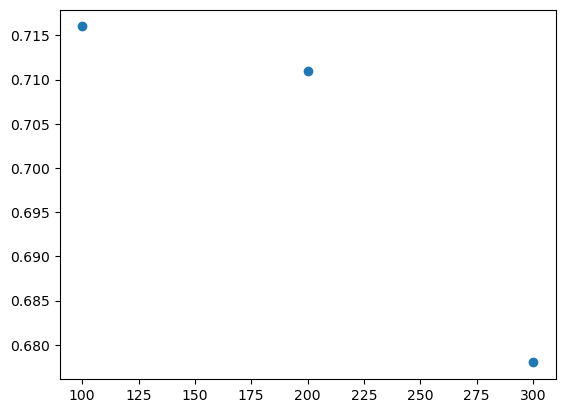

In [83]:
plt.scatter(nn_steps, gsnn_101)
plt.savefig("fm_gsnn_101.png")

In [ ]:
# 10000 labels, 20% labeled

In [ ]:
cl_102 = classifier.ClassificationTests(X_10k, labels, 2000, 10000)

In [ ]:
# first experiment: average scores

In [ ]:
gs_102, os_102 = classifier.ClassificationExperiments.run(tester=cl_102, trials=3)

In [ ]:
objs.append(gs_102)
objs.append(os_102)

In [ ]:
# second experiment: average scores, varying eigenvectors

In [ ]:
gsve_102, osve_102 = classifier.ClassificationExperiments.vary_eigenvectors(tester=cl_102, trials=3, steps=steps)

In [ ]:
objs.append(gsve_102)
objs.append(osve_102)

In [ ]:
plt.scatter(steps, osve_102)
plt.savefig("fm_osve_102.png")

In [ ]:
plt.scatter(steps, gsve_102)
plt.savefig("fm_osve_102.png")

In [ ]:
# third experiment: average scores, varying nearest neighbors

In [ ]:
gsnn_102, osnn_102 = classifier.ClassificationExperiments.vary_neighbors(tester=cl_102, trials=3, steps=nn_steps)

In [ ]:
objs.append(gsnn_102)
objs.append(osnn_102)

In [ ]:
plt.scatter(nn_steps, osnn_102)
plt.savefig("fm_osnn_102.png")

In [ ]:
plt.scatter(nn_steps, gsnn_102)
plt.savefig("fm_gsnn_102.png")

In [ ]:
# 20000 labels, 5% labeled

In [ ]:
X_20k = X[:20000,:28,:28]

In [ ]:
X_20k = np.reshape(X_20k, (20000, 784))

In [ ]:
labels_20k = mnist.targets.numpy()[:20000]

In [ ]:
cl_205 = classifier.ClassificationTests(X_20k, labels_20k, 1000, 20000)

In [ ]:
# first experiment: average scores

In [ ]:
gs_205, os_205 = classifier.ClassificationExperiments.run(tester=cl_205, trials=3)

In [ ]:
objs.append(gs_205)
objs.append(os_205)

In [ ]:
# second experiment: average scores, varying eigenvectors

In [ ]:
gsve_205, osve_205 = classifier.ClassificationExperiments.vary_eigenvectors(tester=cl_205, trials=3, steps=steps)

In [ ]:
objs.append(gsve_205)
objs.append(osve_205)

In [ ]:
plt.scatter(steps, osve_205)
plt.savefig("fm_osve_205.png")

In [ ]:
plt.scatter(steps, gsve_205)
plt.savefig("fm_osve_205.png")

In [ ]:
# third experiment: average scores, varying nearest neighbors

In [ ]:
gsnn_205, osnn_205 = classifier.ClassificationExperiments.vary_neighbors(tester=cl_205, trials=3, steps=nn_steps)

In [ ]:
objs.append(gsnn_205)
objs.append(osnn_205)

In [ ]:
plt.scatter(nn_steps, osnn_205)
plt.savefig("fm_osnn_205.png")

In [ ]:
plt.scatter(nn_steps, gsnn_205)
plt.savefig("fm_gsnn_205.png")

In [ ]:
# 50000 labels, 10% labeled

In [ ]:
X_50k = X[:50000,:28,:28]

In [ ]:
X_50k = np.reshape(X_50k, (50000, 784))

In [ ]:
labels_50k = mnist.targets.numpy()[:50000]

In [ ]:
cl_510 = classifier.ClassificationTests(X_50k, labels_50k, 5000, 50000)

In [ ]:
# first experiment: average scores

In [ ]:
gs_510, os_510 = classifier.ClassificationExperiments.run(tester=cl_510, trials=3)

In [ ]:
objs.append(gs_510)
objs.append(os_510)

In [ ]:
# second experiment: average scores, varying eigenvectors

In [ ]:
gsve_510, osve_510 = classifier.ClassificationExperiments.vary_eigenvectors(tester=cl_510, trials=3, steps=steps)

In [ ]:
objs.append(gsve_510)
objs.append(osve_510)

In [ ]:
plt.scatter(steps, osve_510)
plt.savefig("fm_osve_510.png")

In [ ]:
plt.scatter(steps, gsve_510)
plt.savefig("fm_gsve_510.png")

In [ ]:
# third experiment: average scores, varying nearest neighbors

In [ ]:
gsnn_510, osnn_510 = classifier.ClassificationExperiments.vary_neighbors(tester=cl_510, trials=3, steps=nn_steps)

In [ ]:
objs.append(gsnn_510)
objs.append(osnn_510)

In [ ]:
plt.scatter(nn_steps, osnn_510)
plt.savefig("fm_osnn_510.png")

In [ ]:
plt.scatter(nn_steps, gsnn_510)
plt.savefig("fm_gsnn_510.png")

In [ ]:
save_object(objs, "fm_objects")